<a href="https://colab.research.google.com/github/ameliachoi/coursera-IBM-data-science/blob/master/coursera_python_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Coursera] Data Analysis with Python**
# Section 5. Model Evaluation and Refinement

## Table of Contents
1. Model Evaluation
2. Over-fitting, Under-fitting and Model Selection
3. Ridge Regression
4. Grid Search

---

In [0]:
# setting
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [0]:
df.to_csv('module_5_auto.csv')

In [4]:
# only using numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [0]:
# libraries for plotting
%%capture
! pip install ipywidgets

In [0]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [0]:
# function of plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  width = 12
  height = 10
  plt.figure(figsize=(width, height))

  ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
  ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)

  plt.title(Title)
  plt.xlabel('Price (in dollars)')
  plt.ylabel('Proportion of Cars')
  
  plt.show()
  plt.close()

In [0]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
  width = 12
  height = 10
  plt.figure(figsize=(width, height))

  # training data
  # testing data
  # lr : linear regression object
  # poly_transform : polynomial transformation object

  xmax = max([xtrain.values.max(), xtest.values.max()])
  xmin = min([xtrain.values.min(), xtest.values.min()])
  x=np.arange(xmin, xmax, 0.1) # 0.1 간격으로 xmin부터 xmax까지

  plt.plot(xtrain, y_train, 'ro', label='Training Data')
  plt.plot(xtest, y_test, 'go', label='Test Data')
  plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
  plt.ylim([-10000, 60000])
  plt.ylabel('Price')
  plt.legend()

### Model Evaluation
#### Training and Testing

In [0]:
# target data = y_data
y_data = df['price']

In [0]:
# drop 'price' in x data
x_data = df.drop('price', axis=1)

In [11]:
# using function train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1) # testing dataset은 전체의 15%

print('number of test samples: ', x_test.shape[0])
print('number of training samples: ', x_train.shape[0])

number of test samples:  31
number of training samples:  170


In [0]:
# import linear regression
from sklearn.linear_model import LinearRegression

In [0]:
lre = LinearRegression()

In [14]:
lre.fit(x_train[['horsepower']], y_train) # using 'horsepower' feature

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lre.score(x_test[['horsepower']], y_test) # calculate R^2 on the test data

0.707688374146705

In [16]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

#### Cross-validation Score
[cross validation 교차검증에 대한 자세한 내용은 해당 blog post 참고](https://cinema4dr12.tistory.com/1275)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) # cv = the number of folds

In [19]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [21]:
print('The mean of the folds are', Rcross.mean(), 'and the standard deviation is', Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [22]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [0]:
# predict the output
from sklearn.model_selection import cross_val_predict

In [24]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

---

### Overfitting, Underfitting and Model selection

In [27]:
# create MLR
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [29]:
# prediction using testing data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [30]:
# perform model evaluation using our training and testing data seperately
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Plot of predicted values using the training data compared to the training data

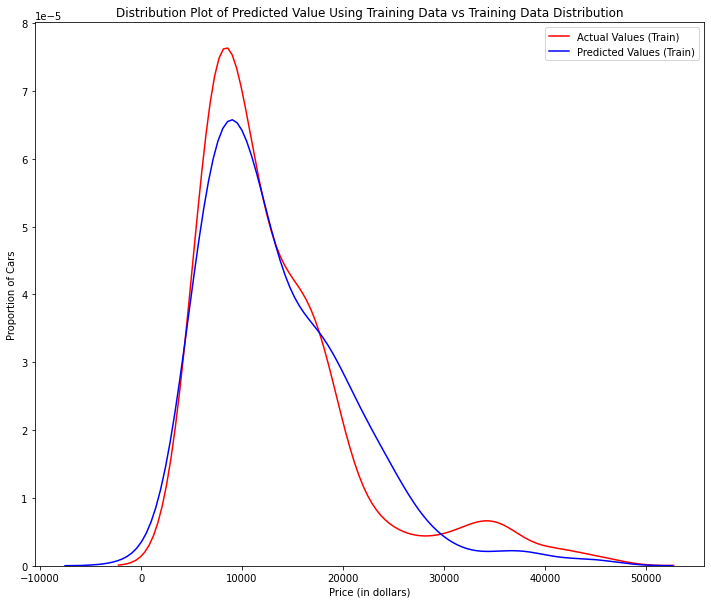

In [32]:
# examine the distribution of the predicted values of the training data
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, 'Actual Values (Train)', 'Predicted Values (Train)', Title)

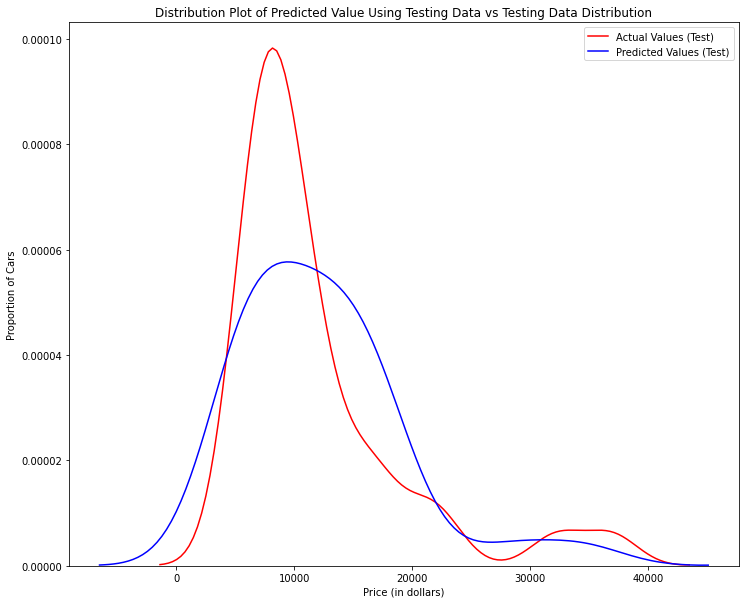

In [33]:
# examine the distribution of the predicted values of the testing data
Title = 'Distribution Plot of Predicted Value Using Testing Data vs Testing Data Distribution'
DistributionPlot(y_test, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

testing data에 대해서는 적합도가 높은 것으로 나오지만, new data인 testing data가 들어오면 적합도가 낮아지는 것을 볼 수 있다.

#### Plot of predicted value using the test data compared to the test data

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
# overfitting
# 55% of the data for testing and the rest for training:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [38]:
# degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [39]:
# create a linear regression model 'poly' and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [41]:
print('Predicted values: ', yhat[0:4])
print('True values: ', y_test[0:4].values)

Predicted values:  [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values:  [ 6295. 10698. 13860. 13499.]


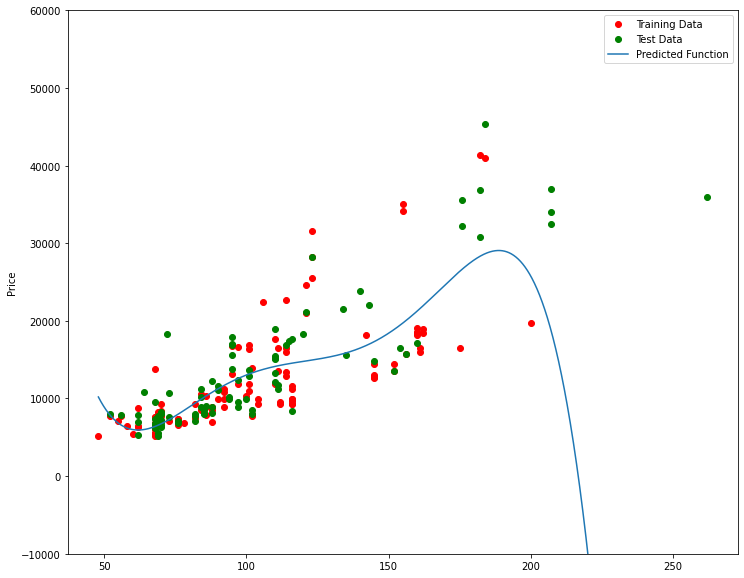

In [42]:
# display the training data, testing data and the predicted function
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [43]:
poly.score(x_train_pr, y_train) # R^2 of the training data

0.556771690212023

In [44]:
poly.score(x_test_pr, y_test) # R^2 of the testing data

-29.871340302044153

The lower the R^2, the worse the model, a negative R^2 is a sign of overfitting

Text(3, 0.75, 'Maximum R^2')

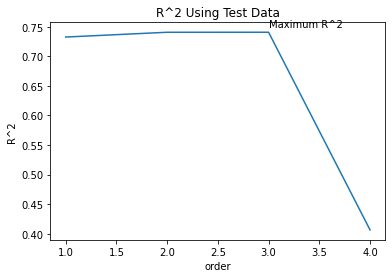

In [46]:
# change R^2 on the test data for different order polynomials and plot the results
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  lr.fit(x_train_pr, y_train)
  Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

R^2는 order값이 4일 때 급격히 하락함

In [0]:
def f(order, test_data):
  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
  pr = PolynomialFeatures(degree=order)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  poly = LinearRegression()
  poly.fit(x_train_pr, y_train)
  PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [49]:
# experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05)) # order는 0부터 6까지 1 단위로, test_data는 0.05부터 0.95까지 0.05 간격으로

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

---

### Ridge regression 능선회귀
[자세한 내용은 해당 blog post 참조](https://brunch.co.kr/@itschloe1/11)

In [0]:
# perform a degree two polynomial transformation
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [0]:
# import ridge from the module linear models
from sklearn.linear_model import Ridge

In [0]:
RigeModel = Ridge(alpha=0.1)

In [53]:
RigeModel.fit(x_train_pr, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
yhat = RigeModel.predict(x_test_pr)

In [55]:
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set: [ 6295. 10698. 13860. 13499.]


In [0]:
# select the value of alfa that minimizes the test error => using a for loop
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0, 1000))
for alfa in ALFA:
  RigeModel = Ridge(alpha=alfa)
  RigeModel.fit(x_train_pr, y_train)
  Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
  Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

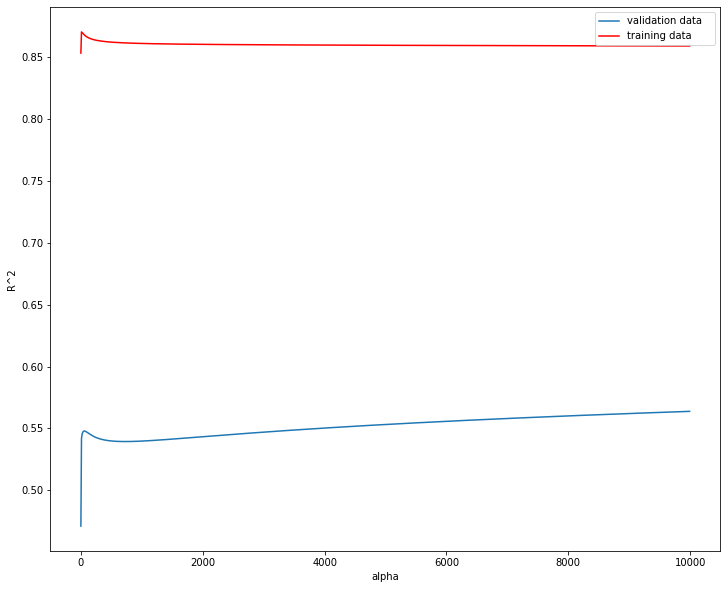

In [58]:
# plot out the value of R^2 for different alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA, Rsqu_test, label='validation data   ')
plt.plot(ALFA, Rsqu_train, 'r', label='training data   ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

- blue line represents the R^2 of the test data
- red line represents the R^2 of the training data


---

### Grid Search
the class `GridSearchCV` makes the process of finding the best hyperparameter simpler

In [0]:
from sklearn.model_selection import GridSearchCV

In [60]:
parameter1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameter1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [61]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
# create a ridge grid search object
Grid1 = GridSearchCV(RR, parameter1, cv=4)

In [63]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
# test our model
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152

최적의 hyperparameter에서 모델의 testset 점수는 약 84점으로 확인됨